In [1]:
import os

import pandas

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import seaborn
import scipy.stats

import math
import numpy 

import datetime
import pytz

In [2]:
root_path = '/Users/matthieu/Documents/proto3/blumau_experiments_processing/data/beetle/'

data_path = root_path + '2feeders/'
conf_path = root_path + 'config/'

data_file = data_path + '2feeders_exp_result.csv'

In [3]:
# From google sheets spreadsheet
data = pandas.read_csv(data_file)

datetime_objects    = []
starttime_objects   = []
stoptime_objects    = []
type_objects        = []

for ind, dat in data.iterrows():

    dt_str          = dat.date
    start_time_str  = dat.start_time
    stop_time_str   = dat.stop_time

    if dat.type == 1:
        type_str    = 'Control'  
    elif dat.type == 2:
        type_str    = 'Vibs to South'
    else :
        type_str    = 'Vibs to North'


    datetime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str, "%d.%m.%y")))
    starttime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+'T'+start_time_str, "%d.%m.%yT%H:%M:%S")))
    stoptime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+'T'+stop_time_str, "%d.%m.%yT%H:%M:%S")))
    type_objects.append(type_str)


data['dt'] = datetime_objects
data['dtts_start'] = starttime_objects
data['dtts_stop'] = stoptime_objects
data['duration']=data.dtts_stop - data.dtts_start
data['type_hr'] = type_objects
data

,date,start_time,stop_time,type,recruits_s,recruits_n,removed_s,removed_n,dt,dtts_start,dtts_stop,duration,type_hr
0,29.07.23,13:00:00,13:30:00,1,2,2,5,0,2023-07-29 00:00:00+00:00,2023-07-29 13:00:00+00:00,2023-07-29 13:30:00+00:00,0 days 00:30:00,Control
1,29.07.23,13:30:00,14:00:00,3,0,0,5,0,2023-07-29 00:00:00+00:00,2023-07-29 13:30:00+00:00,2023-07-29 14:00:00+00:00,0 days 00:30:00,Vibs to North
2,29.07.23,14:00:00,14:30:00,1,0,2,4,0,2023-07-29 00:00:00+00:00,2023-07-29 14:00:00+00:00,2023-07-29 14:30:00+00:00,0 days 00:30:00,Control
3,29.07.23,14:30:00,15:00:00,2,1,3,15,0,2023-07-29 00:00:00+00:00,2023-07-29 14:30:00+00:00,2023-07-29 15:00:00+00:00,0 days 00:30:00,Vibs to South
4,29.07.23,15:00:00,15:30:00,1,5,2,22,0,2023-07-29 00:00:00+00:00,2023-07-29 15:00:00+00:00,2023-07-29 15:30:00+00:00,0 days 00:30:00,Control
5,29.07.23,15:30:00,16:00:00,3,0,2,2,0,2023-07-29 00:00:00+00:00,2023-07-29 15:30:00+00:00,2023-07-29 16:00:00+00:00,0 days 00:30:00,Vibs to North
6,29.07.23,16:00:00,16:30:00,1,0,2,1,0,2023-07-29 00:00:00+00:00,2023-07-29 16:00:00+00:00,2023-07-29 16:30:00+00:00,0 days 00:30:00,Control
7,29.07.23,16:30:00,17:00:00,2,2,8,3,0,2023-07-29 00:00:00+00:00,2023-07-29 16:30:00+00:00,2023-07-29 17:00:00+00:00,0 days 00:30:00,Vibs to South
8,29.07.23,17:00:00,17:30:00,1,11,2,11,0,2023-07-29 00:00:00+00:00,2023-07-29 17:00:00+00:00,2023-07-29 17:30:00+00:00,0 days 00:30:00,Control
9,29.07.23,17:30:00,18:00:00,3,2,1,6,0,2023-07-29 00:00:00+00:00,2023-07-29 17:30:00+00:00,2023-07-29 18:00:00+00:00,0 days 00:30:00,Vibs to North


In [4]:
v2n_df = data[data.type == 3]
v2s_df = data[data.type == 2]
ctl_df = data[data.type == 1]

Average recruitment rates [South feeder, North feeder]: 
Control : [3.1363636363636362, 1.5909090909090908]
South Vibs : [1.2, 1.9]
North Vibs : [1.8, 1.0]

Standard Devs [South feeder, North feeder]: 
Control : [3.8581448113415053, 1.5324767040594283]
South Vibs : [0.9189365834726815, 2.4244128727957572]
North Vibs : [2.4404006956964173, 0.9428090415820634]



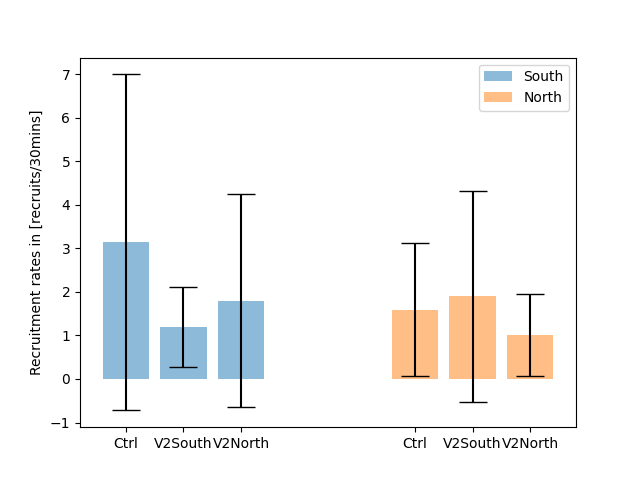

In [5]:
# Average views
ctl_ave = [ctl_df.recruits_s.mean(), ctl_df.recruits_n.mean()]
v2s_ave = [v2s_df.recruits_s.mean(), v2s_df.recruits_n.mean()]
v2n_ave = [v2n_df.recruits_s.mean(), v2n_df.recruits_n.mean()]
ctl_var = [ctl_df.recruits_s.std(), ctl_df.recruits_n.std()]
v2s_var = [v2s_df.recruits_s.std(), v2s_df.recruits_n.std()]
v2n_var = [v2n_df.recruits_s.std(), v2n_df.recruits_n.std()]
means_rec   = numpy.squeeze(numpy.array([[ctl_ave], [v2s_ave], [v2n_ave]]))
stds_rec    = numpy.squeeze(numpy.array([[ctl_var], [v2s_var], [v2n_var]]))

print('Average recruitment rates [South feeder, North feeder]: ')
print('Control : {}'.format(ctl_ave))
print('South Vibs : {}'.format(v2s_ave))
print('North Vibs : {}'.format(v2n_ave))
print()
print('Standard Devs [South feeder, North feeder]: ')
print('Control : {}'.format(ctl_var))
print('South Vibs : {}'.format(v2s_var))
print('North Vibs : {}'.format(v2n_var))
print()

fig, ax = matplotlib.pyplot.subplots()
ax.bar(range(0, 3), means_rec[:, 0], yerr=stds_rec[:, 0], align='center', alpha=0.5, ecolor='black', capsize=10, label='South')
ax.bar(range(5, 8), means_rec[:, 1], yerr=stds_rec[:, 1], align='center', alpha=0.5, ecolor='black', capsize=10, label='North')
ax.set_xticks([0,1,2,5,6,7])
ax.set_xticklabels(['Ctrl', 'V2South', 'V2North', 'Ctrl', 'V2South', 'V2North'])
ax.set_ylabel('Recruitment rates in [recruits/30mins]')
_ = ax.legend()

In [6]:
# More bees North or South (sign test)
data_act = data[data.type != 1]
data_act["preference"] = (data_act.recruits_s - data_act.recruits_n)/abs(data_act.recruits_s - data_act.recruits_n)/2+2.5

data_act

/var/folders/gp/4448rp494v37dvsvd0rwbyvw0000gn/T/ipykernel_58746/103163577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_act["preference"] = (data_act.recruits_s - data_act.recruits_n)/abs(data_act.recruits_s - data_act.recruits_n)/2+2.5


,date,start_time,stop_time,type,recruits_s,recruits_n,removed_s,removed_n,dt,dtts_start,dtts_stop,duration,type_hr,preference
1,29.07.23,13:30:00,14:00:00,3,0,0,5,0,2023-07-29 00:00:00+00:00,2023-07-29 13:30:00+00:00,2023-07-29 14:00:00+00:00,0 days 00:30:00,Vibs to North,NaN
3,29.07.23,14:30:00,15:00:00,2,1,3,15,0,2023-07-29 00:00:00+00:00,2023-07-29 14:30:00+00:00,2023-07-29 15:00:00+00:00,0 days 00:30:00,Vibs to South,2.0
5,29.07.23,15:30:00,16:00:00,3,0,2,2,0,2023-07-29 00:00:00+00:00,2023-07-29 15:30:00+00:00,2023-07-29 16:00:00+00:00,0 days 00:30:00,Vibs to North,2.0
7,29.07.23,16:30:00,17:00:00,2,2,8,3,0,2023-07-29 00:00:00+00:00,2023-07-29 16:30:00+00:00,2023-07-29 17:00:00+00:00,0 days 00:30:00,Vibs to South,2.0
9,29.07.23,17:30:00,18:00:00,3,2,1,6,0,2023-07-29 00:00:00+00:00,2023-07-29 17:30:00+00:00,2023-07-29 18:00:00+00:00,0 days 00:30:00,Vibs to North,3.0
12,30.07.23,10:30:00,11:00:00,3,8,2,6,2,2023-07-30 00:00:00+00:00,2023-07-30 10:30:00+00:00,2023-07-30 11:00:00+00:00,0 days 00:30:00,Vibs to North,3.0
14,30.07.23,11:30:00,12:00:00,2,3,1,5,0,2023-07-30 00:00:00+00:00,2023-07-30 11:30:00+00:00,2023-07-30 12:00:00+00:00,0 days 00:30:00,Vibs to South,3.0
16,30.07.23,12:30:00,13:00:00,3,0,0,4,4,2023-07-30 00:00:00+00:00,2023-07-30 12:30:00+00:00,2023-07-30 13:00:00+00:00,0 days 00:30:00,Vibs to North,NaN
18,30.07.23,13:30:00,14:00:00,2,1,3,6,4,2023-07-30 00:00:00+00:00,2023-07-30 13:30:00+00:00,2023-07-30 14:00:00+00:00,0 days 00:30:00,Vibs to South,2.0
20,30.07.23,14:30:00,15:00:00,3,3,0,7,2,2023-07-30 00:00:00+00:00,2023-07-30 14:30:00+00:00,2023-07-30 15:00:00+00:00,0 days 00:30:00,Vibs to North,3.0


In [7]:
# Group experiments 2-by-2 (previous control + actuation period)
data2by2 = []

flag_first_exp_control = False
last_day_characteristics = {}

for ind, dat in data.iterrows():
    if dat.type == 1:   # control period
        flag_first_exp_control                  = True
        last_day_characteristics['date']        = dat['dt']
        last_day_characteristics['starttime']   = dat.dtts_start
        last_day_characteristics['recruits_s']   = dat.recruits_s
        last_day_characteristics['recruits_n']   = dat.recruits_n
        continue
    else :              # actuation period
        if not(flag_first_exp_control): # if comes first --> not taken into account
            continue
        else :                          # if comes second
            if not(dat['dt'] == last_day_characteristics['date']): # if control was previous day
                flag_first_exp_control = False
                continue
            else :
                dat2by2 = {}
                dat2by2['dt']           = dat['dt']
                dat2by2['type']         = dat.type
                dat2by2['dtts_start']   = last_day_characteristics['starttime']
                dat2by2['dtts_stop']    = dat.dtts_stop
                dat2by2['duration']     = dat.dtts_stop - last_day_characteristics['starttime']
                dat2by2['recruits_s']   = dat.recruits_s + last_day_characteristics['recruits_s']
                dat2by2['recruits_n']   = dat.recruits_n + last_day_characteristics['recruits_n']
                dat2by2['type_hr']      = dat.type_hr
                flag_first_exp_control  = False
                data2by2.append(dat2by2)
    
data2by2 = pandas.DataFrame.from_dict(data2by2)
data2by2

,dt,type,dtts_start,dtts_stop,duration,recruits_s,recruits_n,type_hr
0,2023-07-29 00:00:00+00:00,3,2023-07-29 13:00:00+00:00,2023-07-29 14:00:00+00:00,0 days 01:00:00,2,2,Vibs to North
1,2023-07-29 00:00:00+00:00,2,2023-07-29 14:00:00+00:00,2023-07-29 15:00:00+00:00,0 days 01:00:00,1,5,Vibs to South
2,2023-07-29 00:00:00+00:00,3,2023-07-29 15:00:00+00:00,2023-07-29 16:00:00+00:00,0 days 01:00:00,5,4,Vibs to North
3,2023-07-29 00:00:00+00:00,2,2023-07-29 16:00:00+00:00,2023-07-29 17:00:00+00:00,0 days 01:00:00,2,10,Vibs to South
4,2023-07-29 00:00:00+00:00,3,2023-07-29 17:00:00+00:00,2023-07-29 18:00:00+00:00,0 days 01:00:00,13,3,Vibs to North
5,2023-07-30 00:00:00+00:00,3,2023-07-30 10:00:00+00:00,2023-07-30 11:00:00+00:00,0 days 01:00:00,11,5,Vibs to North
6,2023-07-30 00:00:00+00:00,2,2023-07-30 11:00:00+00:00,2023-07-30 12:00:00+00:00,0 days 01:00:00,17,4,Vibs to South
7,2023-07-30 00:00:00+00:00,3,2023-07-30 12:00:00+00:00,2023-07-30 13:00:00+00:00,0 days 01:00:00,2,0,Vibs to North
8,2023-07-30 00:00:00+00:00,2,2023-07-30 13:00:00+00:00,2023-07-30 14:00:00+00:00,0 days 01:00:00,2,3,Vibs to South
9,2023-07-30 00:00:00+00:00,3,2023-07-30 14:00:00+00:00,2023-07-30 15:00:00+00:00,0 days 01:00:00,8,1,Vibs to North


South recruits : RanksumsResult(statistic=-1.2247448713915892, pvalue=0.22067136191984682)
North recruits : RanksumsResult(statistic=1.2655697004379753, pvalue=0.20566717961735548)


Text(0.5, 1.0, 'North recruits difference with previous control')

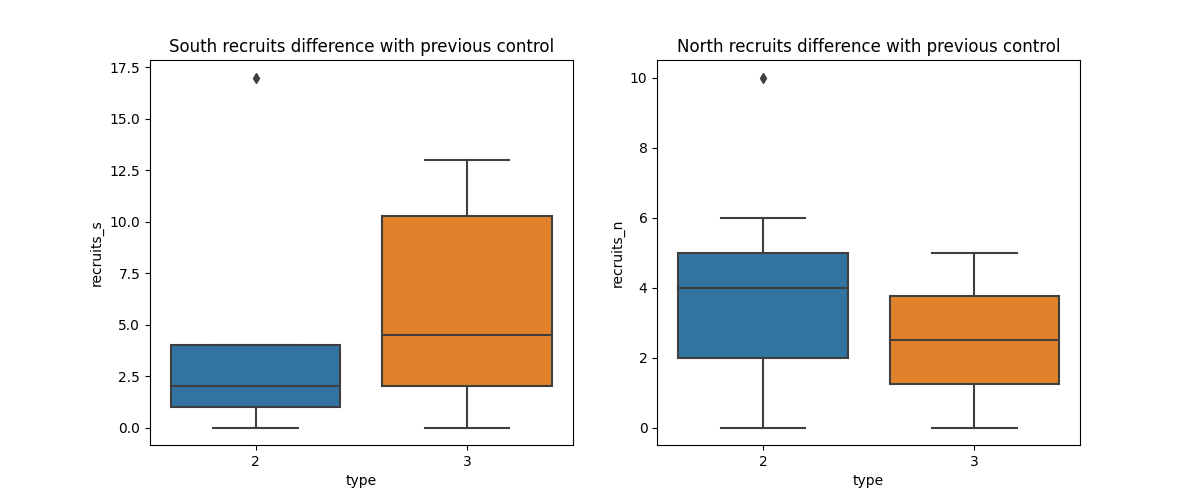

In [8]:
print("South recruits : {}".format(scipy.stats.ranksums(data2by2[data2by2.type == 2].recruits_s, data2by2[data2by2.type == 3].recruits_s)))
print("North recruits : {}".format(scipy.stats.ranksums(data2by2[data2by2.type == 2].recruits_n, data2by2[data2by2.type == 3].recruits_n)))

fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(12, 5))
seaborn.boxplot(data=data2by2, y='recruits_s', x='type', ax=ax[0])
ax[0].set_title('South recruits difference with previous control')
seaborn.boxplot(data=data2by2, y='recruits_n', x='type', ax=ax[1])
ax[1].set_title('North recruits difference with previous control')

In [9]:
# Group experiments 2-by-2 (previous control + actuation period)
data2by2_difference = []

flag_first_exp_control = False
last_day_characteristics = {}

for ind, dat in data.iterrows():
    if dat.type == 1:   # control period
        flag_first_exp_control                  = True
        last_day_characteristics['date']        = dat['dt']
        last_day_characteristics['starttime']   = dat.dtts_start
        last_day_characteristics['recruits_s']   = dat.recruits_s
        last_day_characteristics['recruits_n']   = dat.recruits_n
        continue
    else :              # actuation period
        if not(flag_first_exp_control): # if comes first --> not taken into account
            continue
        else :                          # if comes second
            if not(dat['dt'] == last_day_characteristics['date']): # if control was previous day
                flag_first_exp_control = False
                continue
            else :
                dat2by2 = {}
                dat2by2['dt']           = dat['dt']
                dat2by2['type']         = dat.type
                dat2by2['dtts_start']   = last_day_characteristics['starttime']
                dat2by2['dtts_stop']    = dat.dtts_stop
                dat2by2['duration']     = dat.dtts_stop - last_day_characteristics['starttime']
                # dat2by2['recruits_s']   = [dat.recruits_s/(last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s']) if (last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s'])!=0 else 0]
                # dat2by2['recruits_n']   = [dat.recruits_n/(last_day_characteristics['recruits_s'] + last_day_characteristics['recruits_n']) if (last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s'])!=0 else 0]
                dat2by2['recruits_s']   = last_day_characteristics['recruits_s'] - dat.recruits_s
                dat2by2['recruits_n']   = last_day_characteristics['recruits_n'] - dat.recruits_n
                dat2by2['type_hr']      = dat.type_hr
                flag_first_exp_control  = False
                data2by2_difference.append(dat2by2)
    
data2by2_difference = pandas.DataFrame.from_dict(data2by2_difference)
data2by2_difference

,dt,type,dtts_start,dtts_stop,duration,recruits_s,recruits_n,type_hr
0,2023-07-29 00:00:00+00:00,3,2023-07-29 13:00:00+00:00,2023-07-29 14:00:00+00:00,0 days 01:00:00,2,2,Vibs to North
1,2023-07-29 00:00:00+00:00,2,2023-07-29 14:00:00+00:00,2023-07-29 15:00:00+00:00,0 days 01:00:00,-1,-1,Vibs to South
2,2023-07-29 00:00:00+00:00,3,2023-07-29 15:00:00+00:00,2023-07-29 16:00:00+00:00,0 days 01:00:00,5,0,Vibs to North
3,2023-07-29 00:00:00+00:00,2,2023-07-29 16:00:00+00:00,2023-07-29 17:00:00+00:00,0 days 01:00:00,-2,-6,Vibs to South
4,2023-07-29 00:00:00+00:00,3,2023-07-29 17:00:00+00:00,2023-07-29 18:00:00+00:00,0 days 01:00:00,9,1,Vibs to North
5,2023-07-30 00:00:00+00:00,3,2023-07-30 10:00:00+00:00,2023-07-30 11:00:00+00:00,0 days 01:00:00,-5,1,Vibs to North
6,2023-07-30 00:00:00+00:00,2,2023-07-30 11:00:00+00:00,2023-07-30 12:00:00+00:00,0 days 01:00:00,11,2,Vibs to South
7,2023-07-30 00:00:00+00:00,3,2023-07-30 12:00:00+00:00,2023-07-30 13:00:00+00:00,0 days 01:00:00,2,0,Vibs to North
8,2023-07-30 00:00:00+00:00,2,2023-07-30 13:00:00+00:00,2023-07-30 14:00:00+00:00,0 days 01:00:00,0,-3,Vibs to South
9,2023-07-30 00:00:00+00:00,3,2023-07-30 14:00:00+00:00,2023-07-30 15:00:00+00:00,0 days 01:00:00,2,1,Vibs to North


South recruits : RanksumsResult(statistic=-1.1022703842524302, pvalue=0.2703441406547801)
North recruits : RanksumsResult(statistic=-0.12247448713915891, pvalue=0.9025232501776794)


Text(0.5, 1.0, 'North recruits difference with previous control')

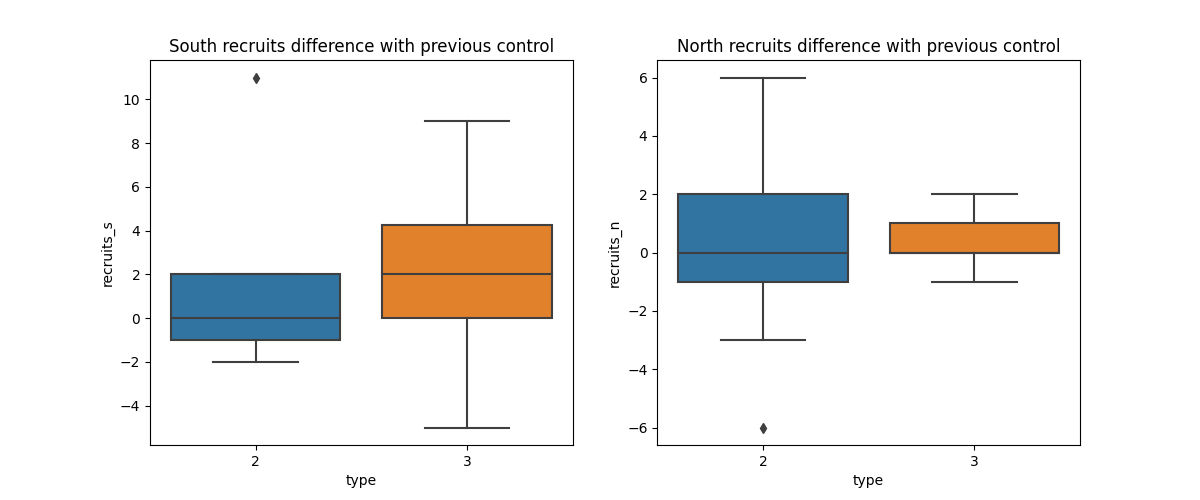

In [10]:
print("South recruits : {}".format(scipy.stats.ranksums(data2by2_difference[data2by2_difference.type == 2].recruits_s, data2by2_difference[data2by2_difference.type == 3].recruits_s)))
print("North recruits : {}".format(scipy.stats.ranksums(data2by2_difference[data2by2_difference.type == 2].recruits_n, data2by2_difference[data2by2_difference.type == 3].recruits_n)))

fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(12, 5))
seaborn.boxplot(data=data2by2_difference, y='recruits_s', x='type', ax=ax[0])
ax[0].set_title('South recruits difference with previous control')
seaborn.boxplot(data=data2by2_difference, y='recruits_n', x='type', ax=ax[1])
ax[1].set_title('North recruits difference with previous control')

In [11]:
# Group experiments 2-by-2 (actuation period - next control)
data2by2_difference_next = []

flag_first_exp_control = False
last_day_characteristics = {}

for ind, dat in data.iterrows():
    if dat.type != 1:   # not control period
        flag_first_exp_control                  = True
        last_day_characteristics['date']        = dat['dt']
        last_day_characteristics['starttime']   = dat.dtts_start
        last_day_characteristics['recruits_s']   = dat.recruits_s
        last_day_characteristics['recruits_n']   = dat.recruits_n
        last_day_characteristics['type']        = dat.type
        last_day_characteristics['type_hr']     = dat.type_hr
        continue
    else :              # control period
        if not(flag_first_exp_control): # if comes first --> not taken into account
            continue
        else :                          # if comes second
            if not(dat['dt'] == last_day_characteristics['date']): # if exp was previous day
                flag_first_exp_control = False
                continue
            else :
                dat2by2 = {}
                dat2by2['dt']           = dat['dt']
                dat2by2['type']         = last_day_characteristics['type']
                dat2by2['dtts_start']   = last_day_characteristics['starttime']
                dat2by2['dtts_stop']    = dat.dtts_stop
                dat2by2['duration']     = dat.dtts_stop - last_day_characteristics['starttime']
                # dat2by2['recruits_s']   = [dat.recruits_s/(last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s']) if (last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s'])!=0 else 0]
                # dat2by2['recruits_n']   = [dat.recruits_n/(last_day_characteristics['recruits_s'] + last_day_characteristics['recruits_n']) if (last_day_characteristics['recruits_n'] + last_day_characteristics['recruits_s'])!=0 else 0]
                dat2by2['recruits_s']   = last_day_characteristics['recruits_s'] - dat.recruits_s
                dat2by2['recruits_n']   = last_day_characteristics['recruits_n'] - dat.recruits_n
                dat2by2['type_hr']      = last_day_characteristics['type_hr']
                flag_first_exp_control  = False
                data2by2_difference_next.append(dat2by2)
    
data2by2_difference_next = pandas.DataFrame.from_dict(data2by2_difference_next)
data2by2_difference_next

,dt,type,dtts_start,dtts_stop,duration,recruits_s,recruits_n,type_hr
0,2023-07-29 00:00:00+00:00,3,2023-07-29 13:30:00+00:00,2023-07-29 14:30:00+00:00,0 days 01:00:00,0,-2,Vibs to North
1,2023-07-29 00:00:00+00:00,2,2023-07-29 14:30:00+00:00,2023-07-29 15:30:00+00:00,0 days 01:00:00,-4,1,Vibs to South
2,2023-07-29 00:00:00+00:00,3,2023-07-29 15:30:00+00:00,2023-07-29 16:30:00+00:00,0 days 01:00:00,0,0,Vibs to North
3,2023-07-29 00:00:00+00:00,2,2023-07-29 16:30:00+00:00,2023-07-29 17:30:00+00:00,0 days 01:00:00,-9,6,Vibs to South
4,2023-07-29 00:00:00+00:00,3,2023-07-29 17:30:00+00:00,2023-07-29 18:30:00+00:00,0 days 01:00:00,0,-1,Vibs to North
5,2023-07-30 00:00:00+00:00,3,2023-07-30 10:30:00+00:00,2023-07-30 11:30:00+00:00,0 days 01:00:00,-6,-1,Vibs to North
6,2023-07-30 00:00:00+00:00,2,2023-07-30 11:30:00+00:00,2023-07-30 12:30:00+00:00,0 days 01:00:00,1,1,Vibs to South
7,2023-07-30 00:00:00+00:00,3,2023-07-30 12:30:00+00:00,2023-07-30 13:30:00+00:00,0 days 01:00:00,-1,0,Vibs to North
8,2023-07-30 00:00:00+00:00,2,2023-07-30 13:30:00+00:00,2023-07-30 14:30:00+00:00,0 days 01:00:00,-4,2,Vibs to South
9,2023-07-30 00:00:00+00:00,3,2023-07-30 14:30:00+00:00,2023-07-30 15:30:00+00:00,0 days 01:00:00,0,-2,Vibs to North


South recruits : RanksumsResult(statistic=-1.4362649974350634, pvalue=0.15092695006671628)
North recruits : RanksumsResult(statistic=2.003211706948904, pvalue=0.04515456962427901)


Text(0.5, 1.0, 'North recruits difference with next control')

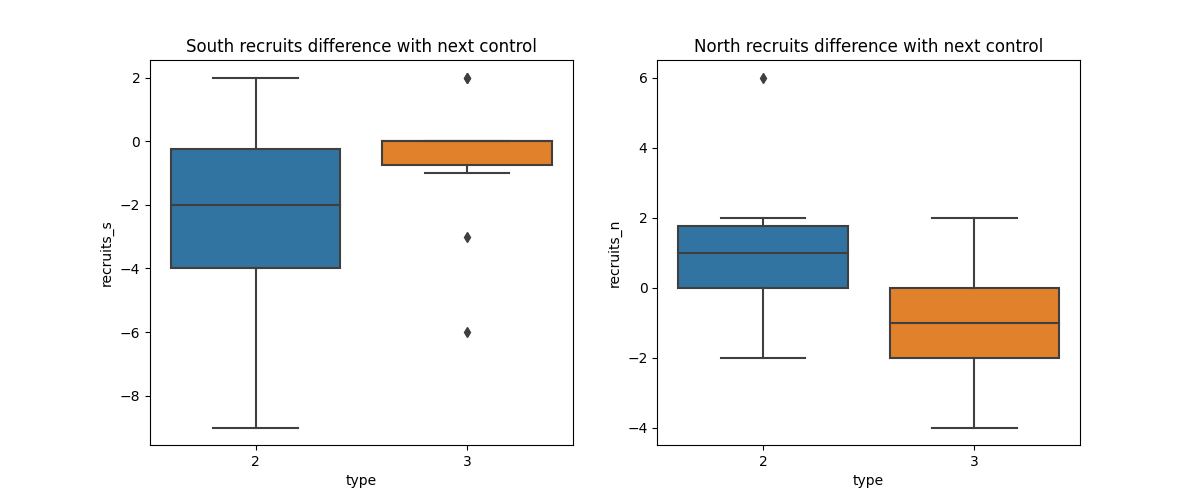

In [12]:
print("South recruits : {}".format(scipy.stats.ranksums(data2by2_difference_next[data2by2_difference_next.type == 2].recruits_s, data2by2_difference_next[data2by2_difference_next.type == 3].recruits_s)))
print("North recruits : {}".format(scipy.stats.ranksums(data2by2_difference_next[data2by2_difference_next.type == 2].recruits_n, data2by2_difference_next[data2by2_difference_next.type == 3].recruits_n)))

fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(12, 5))
seaborn.boxplot(data=data2by2_difference_next, y='recruits_s', x='type', ax=ax[0])
ax[0].set_title('South recruits difference with next control')
seaborn.boxplot(data=data2by2_difference_next, y='recruits_n', x='type', ax=ax[1])
ax[1].set_title('North recruits difference with next control')